<a href="https://colab.research.google.com/github/deswanrakhmat/TravellerTripAnalysis/blob/main/Traveler_Trip_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
df = pd.read_csv('traveller dataset.csv')

In [ ]:
df.head()

,Trip ID,Destination,Start date,End date,Duration (days),Traveler name,Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost
0,1,"London, UK",5/1/2023,5/8/2023,7.0,John Smith,35.0,Male,American,Hotel,1200,Flight,600
1,2,"Phuket, Thailand",6/15/2023,6/20/2023,5.0,Jane Doe,28.0,Female,Canadian,Resort,800,Flight,500
2,3,"Bali, Indonesia",7/1/2023,7/8/2023,7.0,David Lee,45.0,Male,Korean,Villa,1000,Flight,700
3,4,"New York, USA",8/15/2023,8/29/2023,14.0,Sarah Johnson,29.0,Female,British,Hotel,2000,Flight,1000
4,5,"Tokyo, Japan",9/10/2023,9/17/2023,7.0,Kim Nguyen,26.0,Female,Vietnamese,Airbnb,700,Train,200


In [ ]:
# view number of rows and columns
print("Number of rows and columns:", df.shape)

Number of rows and columns: (139, 13)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Trip ID               139 non-null    int64  
 1   Destination           137 non-null    object 
 2   Start date            137 non-null    object 
 3   End date              137 non-null    object 
 4   Duration (days)       137 non-null    float64
 5   Traveler name         137 non-null    object 
 6   Traveler age          137 non-null    float64
 7   Traveler gender       137 non-null    object 
 8   Traveler nationality  137 non-null    object 
 9   Accommodation type    137 non-null    object 
 10  Accommodation cost    137 non-null    object 
 11  Transportation type   136 non-null    object 
 12  Transportation cost   136 non-null    object 
dtypes: float64(2), int64(1), object(10)
memory usage: 14.2+ KB


# # **Exploratory Data Analysis (EDA)**

# **Data Cleaning**

# *Handling Missing Data*

In [ ]:
# Check for missing values
print(df.isnull().sum())

Trip ID                 0
Destination             2
Start date              2
End date                2
Duration (days)         2
Traveler name           2
Traveler age            2
Traveler gender         2
Traveler nationality    2
Accommodation type      2
Accommodation cost      2
Transportation type     3
Transportation cost     3
dtype: int64


In [ ]:
# find rows that have missing values
df[df.isnull().any(axis=1)]

,Trip ID,Destination,Start date,End date,Duration (days),Traveler name,Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost
71,72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,83,"Rome, Italy",4/15/2025,4/22/2025,7.0,James Kim,41.0,Male,American,Hotel,100,NaN,NaN
127,128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# remove rows that have missing values
df.dropna(inplace=True)

print("Missing values have been removed")

Missing values have been removed


# *Data Formatting*

In [ ]:
# Unique values in each column
for col in df.columns:
    print(f'Column name: {col}')
    print(df[col].unique())
    print('\n')

Column name: Trip ID
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  73
  74  75  76  77  78  79  80  81  82  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 129
 130 131 132 133 134 135 136 137 138 139]


Column name: Destination
['London, UK' 'Phuket, Thailand' 'Bali, Indonesia' 'New York, USA'
 'Tokyo, Japan' 'Paris, France' 'Sydney, Australia'
 'Rio de Janeiro, Brazil' 'Amsterdam, Netherlands'
 'Dubai, United Arab Emirates' 'Cancun, Mexico' 'Barcelona, Spain'
 'Honolulu, Hawaii' 'Berlin, Germany' 'Marrakech, Morocco'
 'Edinburgh, Scotland' 'Paris' 'Bali' 'London' 'Tokyo' 'New York' 'Sydney'
 'Rome' 'Bangkok' 'Hawaii' '

**The code is splitting the 'Destination' column into two new columns, 'Destination (1)' and 'Destination X', using the separator ', '. The expand parameter is set to True to create two new columns. Then, the code drops the 'Destination X' column and prints the unique values in the 'Destination (1)' column.**

In [ ]:
# Separating Destination column into Destination (1) and Destination X
df[['Destination (1)', 'Destination X']] = df['Destination'].str.split(', ', expand=True)

# Dropping Destination X column
df = df.drop(columns=['Destination X'])

# Printing unique values in Destination (1) column
print(df["Destination (1)"].unique())

['London' 'Phuket' 'Bali' 'New York' 'Tokyo' 'Paris' 'Sydney'
 'Rio de Janeiro' 'Amsterdam' 'Dubai' 'Cancun' 'Barcelona' 'Honolulu'
 'Berlin' 'Marrakech' 'Edinburgh' 'Rome' 'Bangkok' 'Hawaii' 'Japan'
 'Thailand' 'France' 'Australia' 'Brazil' 'Greece' 'Egypt' 'Mexico'
 'Italy' 'Spain' 'Canada' 'New York City' 'Vancouver' 'Seoul'
 'Los Angeles' 'Cape Town' 'Santorini' 'Phnom Penh' 'Athens' 'Auckland']


**In the Accommodation cost and Transportation cost columns, there are unnecessary characters such as "$", "USD", and white spaces. These characters can cause issues when performing calculations or analysis on the data. It is recommended to remove these characters from the columns to ensure the accuracy of the data.**

In [ ]:
df['Accommodation cost'] = df['Accommodation cost'].str.replace('$', '')
df['Transportation cost'] = df['Transportation cost'].str.replace('$', '')
df['Accommodation cost'] = df['Accommodation cost'].str.replace('USD', '')
df['Transportation cost'] = df['Transportation cost'].str.replace('USD', '')

<ipython-input-11-3e2be593ca07>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Accommodation cost'] = df['Accommodation cost'].str.replace('$', '')
<ipython-input-11-3e2be593ca07>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Transportation cost'] = df['Transportation cost'].str.replace('$', '')


In [ ]:
df['Accommodation cost'] = df['Accommodation cost'].apply(lambda x: float(x.strip().replace(',', '')))
df['Transportation cost'] = df['Transportation cost'].apply(lambda x: float(x.strip().replace(',', '')))

**In the "Transportation type" column, there are similar items such as "Flight", "Plane", and "Airplane". To simplify the data and avoid redundancy, these items are merged into a single item, "Airplane".**

In [ ]:
# Replace values in "Transportation type" column
df["Transportation type"] = df["Transportation type"].replace(["Flight", "Plane", "Airplane"], "Airplane")

# Display updated dataset
print(df.head())

   Trip ID       Destination Start date   End date  Duration (days)  \
0        1        London, UK   5/1/2023   5/8/2023              7.0   
1        2  Phuket, Thailand  6/15/2023  6/20/2023              5.0   
2        3   Bali, Indonesia   7/1/2023   7/8/2023              7.0   
3        4     New York, USA  8/15/2023  8/29/2023             14.0   
4        5      Tokyo, Japan  9/10/2023  9/17/2023              7.0   

   Traveler name  Traveler age Traveler gender Traveler nationality  \
0     John Smith          35.0            Male             American   
1       Jane Doe          28.0          Female             Canadian   
2      David Lee          45.0            Male               Korean   
3  Sarah Johnson          29.0          Female              British   
4     Kim Nguyen          26.0          Female           Vietnamese   

  Accommodation type  Accommodation cost Transportation type  \
0              Hotel              1200.0            Airplane   
1             Reso

**The 'Accommodation cost' and 'Transportation cost' columns are changed to integer type using the 'astype' function, while the 'Start date' and 'End date' columns are changed to datetime type using the 'pd.to_datetime' function. These changes are important because they allow us to perform numerical and time-based operations on the data, as well as make it easier to analyze the data using various statistical methods.**

In [ ]:
# Changing Accommodation cost column to int
df['Accommodation cost'] = df['Accommodation cost'].astype(int)

# Changing Transportation cost column to int
df['Transportation cost'] = df['Transportation cost'].astype(int)

# Changing Start date column to datetime type
df['Start date'] = pd.to_datetime(df['Start date'])

# Changing End date column to datetime type
df['End date'] = pd.to_datetime(df['End date'])

# *Handling duplicates*

In [ ]:
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows:", duplicate_rows.shape[0])

Number of duplicate rows: 0


# **Descriptive Analysis**

In [ ]:
df.describe()

,Trip ID,Duration (days),Traveler age,Accommodation cost,Transportation cost
count,136.000000,136.000000,136.000000,136.000000,136.000000
mean,69.463235,7.610294,33.117647,1253.529412,645.183824
std,40.388284,1.606343,7.139933,1338.644162,584.476153
min,1.000000,5.000000,20.000000,150.000000,20.000000
25%,34.750000,7.000000,28.000000,600.000000,200.000000
50%,68.500000,7.000000,31.000000,900.000000,550.000000
75%,104.250000,8.000000,37.250000,1200.000000,800.000000
max,139.000000,14.000000,60.000000,8000.000000,3000.000000


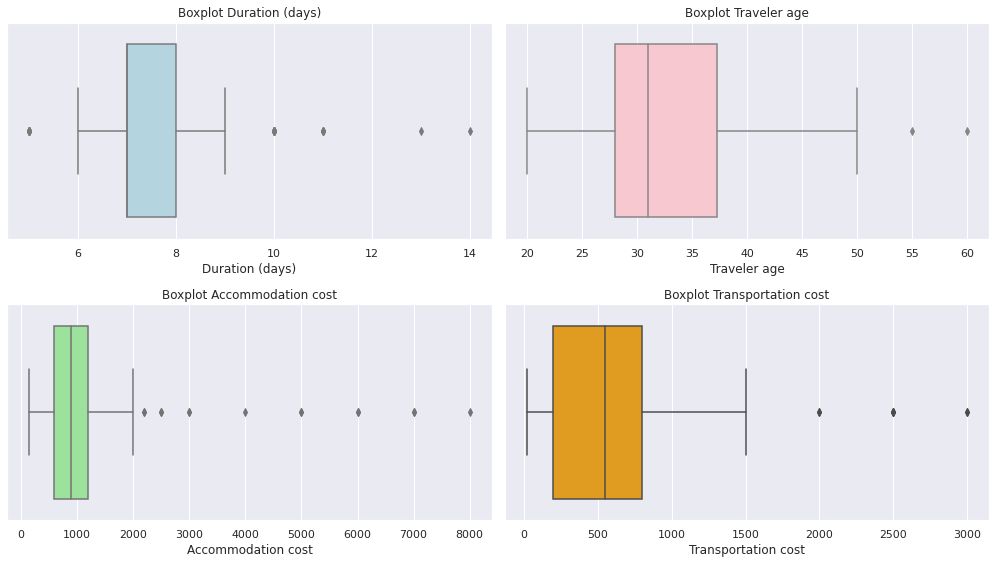

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(14, 8))
axs = axs.flatten()

# Creating boxplot for Duration (days) column
sns.boxplot(x=df['Duration (days)'], ax=axs[0], color='lightblue')
axs[0].set_title('Boxplot Duration (days)')

# Creating boxplot for Traveler age column
sns.boxplot(x=df['Traveler age'], ax=axs[1], color='pink')
axs[1].set_title('Boxplot Traveler age')

# Creating boxplot for Accommodation cost column
sns.boxplot(x=df['Accommodation cost'], ax=axs[2], color='lightgreen')
axs[2].set_title('Boxplot Accommodation cost')

# Creating boxplot for Transportation cost column
sns.boxplot(x=df['Transportation cost'], ax=axs[3], color='orange')
axs[3].set_title('Boxplot Transportation cost')

# Adjusting layout and displaying plot
plt.tight_layout()
plt.show()


**Outliers were found in the boxplots of Duration (days), Traveler age, Accommodation cost, and Transportation cost. However, they were not removed as they are still relevant to the analysis.**

# **Data Visualization**

# *What are the most frequently visited cities and countries by tourists?*

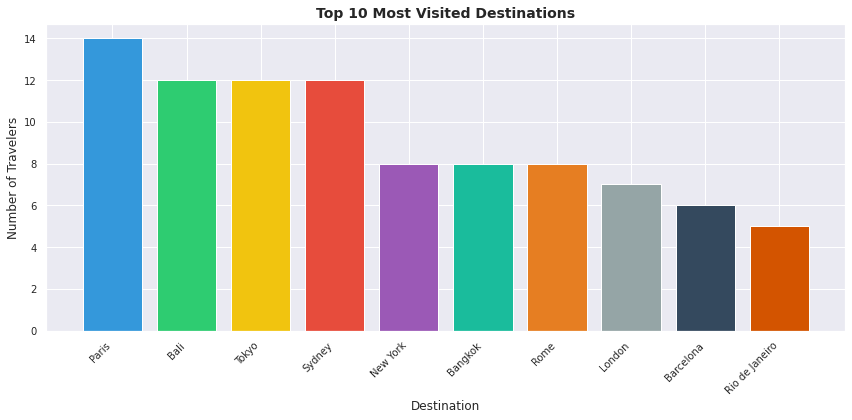

In [ ]:
# count the number of visits to each destination
destination_count = df['Destination (1)'].value_counts().head(10)

# create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(destination_count.index, destination_count.values, color=['#3498db', '#2ecc71', '#f1c40f', '#e74c3c', '#9b59b6', '#1abc9c', '#e67e22', '#95a5a6', '#34495e', '#d35400'])
plt.title('Top 10 Most Visited Destinations', fontsize=14, fontweight='bold')
plt.xlabel('Destination', fontsize=12)
plt.ylabel('Number of Travelers', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

**Top 10 most visited destinations are Paris, Bali, Tokyo, Sydney, New York, Bangkok, Rome, London, Barcelona, and Rio de Janeiro.** 
It is recommended to provide unique and interesting tour packages to these destinations to differentiate from other competitors and offer a more memorable experience to customers. 
Additionally, travel agencies can also explore new destinations that are up-and-coming to offer something new and exciting to travelers.

# *What is the distribution of age among travelers?*

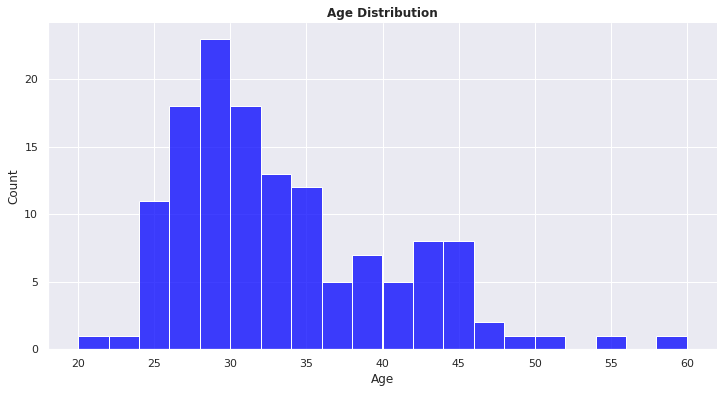

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='Traveler age', bins=20, color='blue')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution', fontweight = 'bold')
sns.despine()
plt.show()

**From the histogram, we can see that the most common age range of travelers is between 25-35 years old, followed by travelers between 35-45 years old.** 
This indicates that the majority of travelers are in their prime working years and may have more disposable income to spend on travel. 
Travel agencies can use this information to tailor their packages and marketing efforts to appeal to this age group. 
Additionally, the information can be useful for accommodations, activities, and attractions that are more popular with this age group.

# *What is the distribution of gender among the travelers?*

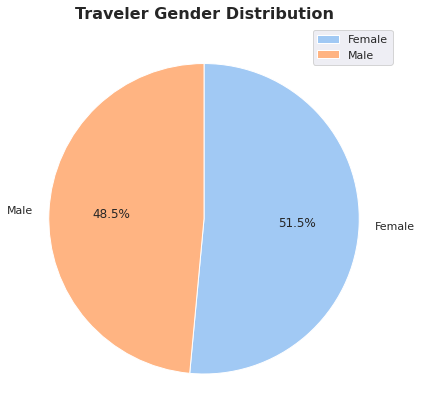

In [ ]:
# Group by gender and count number of travelers
gender_counts = df.groupby('Traveler gender')['Traveler name'].count()

# Create pie chart
plt.figure(figsize=(12, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, counterclock=False, colors=sns.color_palette('pastel'))
plt.title('Traveler Gender Distribution', fontsize=16, fontweight='bold')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

**The visualization shows the gender distribution of travelers, where 51.5% are female and 48.5% are male.** 
This indicates that there is a relatively balanced distribution of genders among the travelers. 
Travel agencies and service providers can use this information to tailor their marketing and services to cater to the needs and preferences of both male and female travelers.

# *What is the distribution of trips by year, month, and day of week for the travelers?*

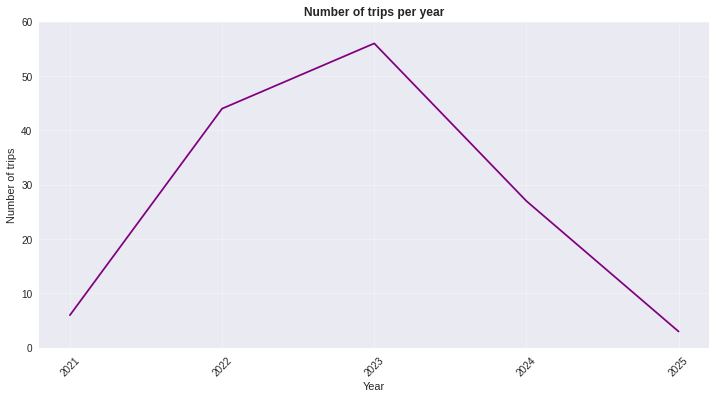

In [ ]:
# Extract year from start date
df['Year'] = df['Start date'].dt.year

# Count number of trips per year
yearly_trips = df.groupby('Year')['Trip ID'].count()

# Set plot style and colors
plt.figure(figsize=(12, 6))
plt.style.use('seaborn')
colors = ['purple']
plt.plot(yearly_trips.index, yearly_trips.values, color=colors[0])
plt.xlabel('Year')
plt.ylabel('Number of trips')
plt.title('Number of trips per year', fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(yearly_trips.index, rotation=45)
plt.yticks(range(0, max(yearly_trips.values)+10, 10))
plt.show()


**The data reveals that the highest year of trips is 2023, and then the number of trips decreases gradually until 2025.** 
This could be due to several factors such as economic downturns, changes in travel trends, or other global events that affect the tourism industry. 
It is important for travel agencies and businesses to monitor these trends and adjust their strategies accordingly to stay competitive in the market. 
Travel agencies can also consider offering incentives or discounts during off-peak seasons to attract more customers.

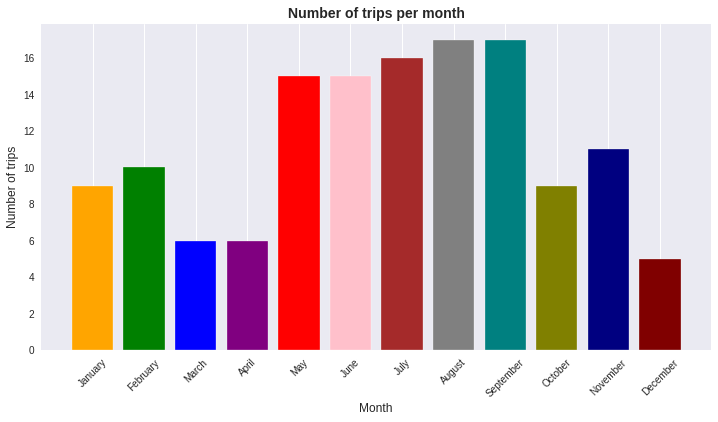

In [ ]:
# Extract month from start date and sort by month number
df['Month'] = df['Start date'].dt.month
df = df.sort_values('Month')

# Create a list of month names in order
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Count number of trips per month
monthly_trips = df.groupby('Month')['Trip ID'].count()

fig, ax = plt.subplots(figsize=(12,6))
colors = ['orange', 'green', 'blue', 'purple', 'red', 'pink', 'brown', 'gray', 'teal', 'olive', 'navy', 'maroon']
ax.bar(months, monthly_trips.values, color=colors)
ax.grid(axis='y')
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Number of trips', fontsize=12)
ax.set_title('Number of trips per month', fontsize=14, fontweight='bold')
ax.tick_params(axis='x', rotation=45)
plt.show()

**August and September are the busiest months for trips**, likely due to summer vacation in many parts of the world. **May, June, and July are also busy months for travel**, as they are also part of the summer season in many countries. **November and February** are popular months for travel as well, likely due to holidays and winter vacations. However, it's important to note that the specific reasons for travel and the busiest months may vary depending on the destination and the preferences of travelers.

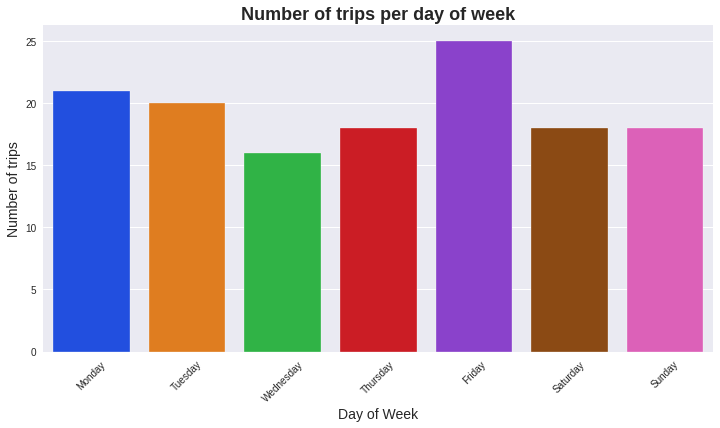

In [ ]:
# Extract day of week from start date and set it as categorical variable
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Day of Week'] = pd.Categorical(df['Start date'].dt.day_name(), categories=day_order, ordered=True)

# Count number of trips per day of week
daily_trips = df.groupby('Day of Week')['Trip ID'].count()

colors = sns.color_palette('bright')
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x=daily_trips.index, y=daily_trips.values, palette=colors, ax=ax)
ax.set_xlabel('Day of Week', fontsize=14)
ax.set_ylabel('Number of trips', fontsize=14)
ax.set_title('Number of trips per day of week', fontsize=18, fontweight ='bold')
ax.tick_params(axis='x', rotation=45)
plt.show()

**The most popular days for trips are Friday, Monday, and Tuesday,** which could potentially indicate that travelers are taking advantage of weekends and long weekends to plan their trips. 
It could also suggest that travelers are trying to optimize their time off work or school by taking trips during weekdays, which tend to have fewer crowds and lower prices. Additionally, some travelers may prefer to travel during weekdays to avoid the rush of weekend travel.

# *What is the distribution of nationalities among the travelers?*

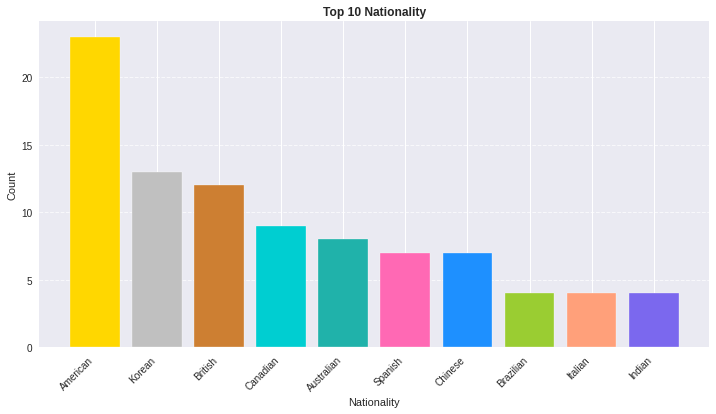

In [ ]:
nationality_counts = df['Traveler nationality'].value_counts().head(10)
plt.figure(figsize=(12,6))
plt.bar(nationality_counts.index, nationality_counts.values, color=['#FFD700', '#C0C0C0', '#CD7F32', '#00CED1', '#20B2AA', '#FF69B4', '#1E90FF', '#9ACD32', '#FFA07A', '#7B68EE'])
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.title('Top 10 Nationality', fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.show()

**American, Korean, British, and Canadian are the most common nationalities among travelers**. This information can be valuable for travel agencies and businesses in the tourism industry to customize their marketing strategies and cater to the needs and preferences of these specific nationalities. They are more likely to travel and potentially spend more money on trips, and may require language support, cultural activities, or cuisine options specific to their backgrounds.

# *What is the most commonly used type of accommodation by travelers*

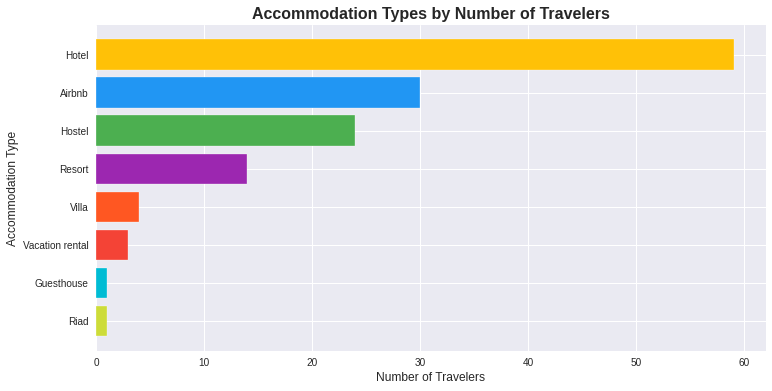

In [ ]:
# group by Accommodation Type and count number of travelers
accommodation_counts = df.groupby('Accommodation type')['Traveler name'].count()

# sort by number of travelers in descending order
accommodation_counts = accommodation_counts.sort_values(ascending=False)

# get top 10 Accommodation Type by number of travelers
top_accommodation = accommodation_counts

# create a figure and axes object
fig, ax = plt.subplots(figsize=(12, 6))
ax.barh(top_accommodation.index, top_accommodation.values, color=['#FFC107', '#2196F3', '#4CAF50', '#9C27B0', '#FF5722', '#F44336', '#00BCD4', '#CDDC39', '#673AB7', '#E91E63'])
ax.set_title('Accommodation Types by Number of Travelers', fontsize=16, fontweight='bold')
ax.set_xlabel('Number of Travelers', fontsize=12)
ax.set_ylabel('Accommodation Type', fontsize=12)
ax.tick_params(axis='y', labelsize=10)
ax.invert_yaxis()
plt.show()

**Hotels, followed by Airbnb, hostels, and resorts, are the most common types of accommodations used by travelers**. Travelers tend to prefer these types of accommodations due to their convenience, availability, and affordability. Hotels offer various amenities and services such as room service, breakfast, and access to a pool or gym, while Airbnb provides a unique and personalized experience with its home-sharing concept. Hostels and resorts are also popular options, especially for budget-conscious travelers or those looking for a luxurious vacation. Knowing the most common types of accommodations can help travel agencies tailor their packages to meet the needs and preferences of their customers.

# *How does the cost of accommodation vary with the type of accommodation?*

The median was used to calculate the cost of accommodation because of the presence of outliers in the data. Outliers can heavily impact the mean, leading to an inaccurate portrayal of the typical cost. Utilizing the median, which represents the middle value in the data, results in a more resilient measure of central tendency that is not affected by extreme values. Consequently, using the median is a more suitable method to examine the data and draw significant conclusions regarding the typical cost of accommodation.

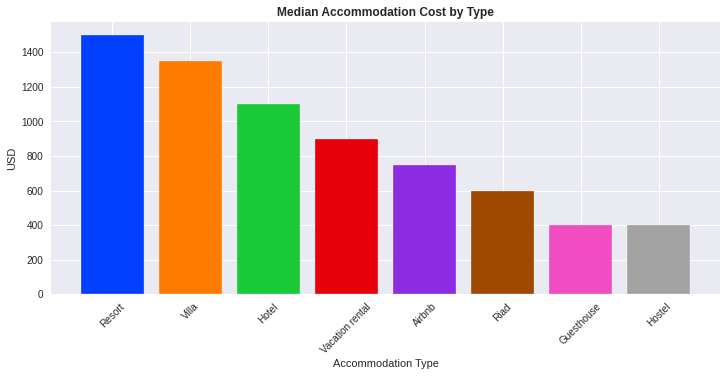

In [ ]:
# Calculating median price for each type of accommodation
med_price = df.groupby('Accommodation type')['Accommodation cost'].median()

# Sorting by highest price
med_price = med_price.sort_values(ascending=False)

# Creating plot
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(med_price.index, med_price.values, color=colors)
colors = ['mediumturquoise', 'mediumturquoise', 'cornflowerblue', 'cornflowerblue', 'mediumslateblue', 'mediumslateblue', 'lightcoral', 'lightcoral', 'palevioletred', 'palevioletred']
ax.set_xlabel('Accommodation Type')
ax.set_ylabel('USD')
ax.set_title('Median Accommodation Cost by Type', fontweight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.subplots_adjust(bottom=0.25)
ax.tick_params(axis='x', rotation=45)
plt.show()

**The highest accommodation costs are found in resorts, villas, and hotels, while the lowest are found in hostels and guesthouses.** This suggests that there is a correlation between the most commonly used types of accommodation and their associated costs. For example, hotels may be a more popular choice due to their wider availability and ability to provide more luxurious services and facilities, resulting in higher costs. In contrast, hostels and guesthouses can be a more budget-friendly option as they typically offer lower prices and simpler facilities. This data can be utilized by travel agencies to design travel packages that cater to the needs and preferences of their customers, whether they prioritize comfort or cost savings.

# *What is the most commonly used transportation mode among travelers?*

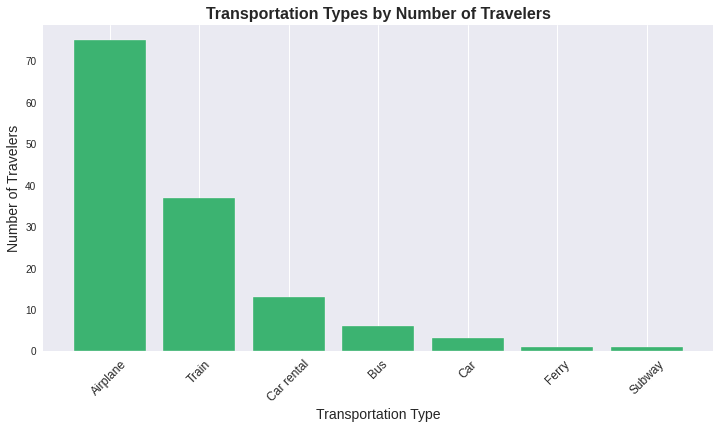

In [ ]:
# group by Transportation Type and count number of travelers
transportation_counts = df.groupby('Transportation type')['Traveler name'].count()

# sort by number of travelers in descending order
transportation_counts = transportation_counts.sort_values(ascending=False)

# get top 10 Transportation Type by number of travelers
top_transportation = transportation_counts

# create bar chart
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(top_transportation.index, top_transportation.values, color='mediumseagreen')
ax.set_title('Transportation Types by Number of Travelers', fontsize=16, fontweight='bold')
ax.set_xlabel('Transportation Type', fontsize=14)
ax.set_ylabel('Number of Travelers', fontsize=14)
ax.set_xticks(range(len(top_transportation)))
ax.set_xticklabels(top_transportation.index, rotation=45, fontsize=12)
ax.grid(axis='y')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

**The most popular modes of transportation for travelers are airplanes, trains, and car rentals**. This indicates that travelers prefer convenient and efficient modes of transportation for long-distance travel. Airplanes are the most popular mode of transportation due to their speed and ability to cover long distances in a short amount of time. Trains are also popular because they offer a comfortable and scenic way to travel, especially for shorter distances. Car rentals are preferred by travelers who want to explore a destination independently or who have specific travel needs, such as transporting large amounts of luggage or traveling with children. This information can be useful for travel agencies in developing travel packages that offer a variety of transportation options based on the client's preferences.

# *How does the cost of transportation vary with the type of transportation?*

The median was used to calculate the cost of transportation because of the presence of outliers in the data. Outliers can heavily impact the mean, leading to an inaccurate portrayal of the typical cost. Utilizing the median, which represents the middle value in the data, results in a more resilient measure of central tendency that is not affected by extreme values. Consequently, using the median is a more suitable method to examine the data and draw significant conclusions regarding the typical cost of transportation.

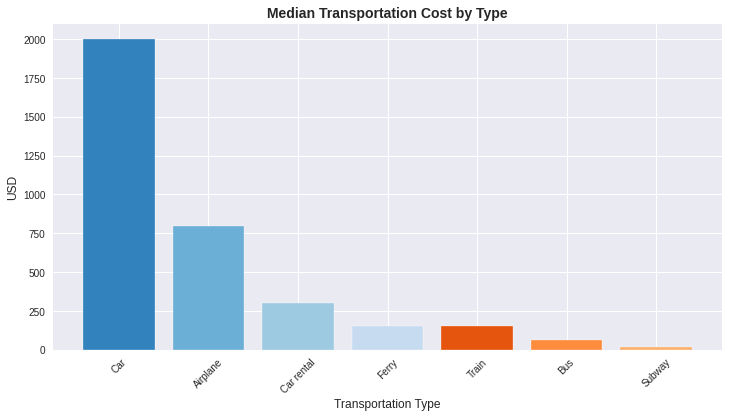

In [ ]:
# Calculating median price for each transportation type
med_price = df.groupby('Transportation type')['Transportation cost'].median()

# Sorting by highest price
med_price = med_price.sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(12,6))
colors = sns.color_palette('tab20c', len(med_price.index))
ax.bar(med_price.index, med_price.values, color=colors)
ax.grid(True, axis='y')
ax.set_xlabel('Transportation Type', fontsize=12)
ax.set_ylabel('USD', fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_title('Median Transportation Cost by Type', fontsize=14, fontweight='bold')
ax.tick_params(axis='x', rotation=45)
plt.show()

The data shows that the most popular modes of transportation used by travelers are airplanes, trains, and car rentals. This indicates a correlation between the popularity of transportation types and their corresponding costs. For example, air travel may be the most popular choice due to its speed and convenience, but it can also be more expensive than other modes of transportation such as subways or buses. Similarly, renting a car can provide more flexibility and convenience but may also come with a higher price tag.

**The highest transportation costs are for cars, followed by airplanes and car rentals, while subways and buses have the lowest costs.** This information can be useful for travel agencies to offer packages that cater to different budget ranges and preferences. For example, budget-conscious travelers may be more interested in packages that prioritize the use of lower-cost transportation modes like buses or subways. On the other hand, luxury travelers may prefer packages that prioritize more expensive modes of transportation like first-class air travel or luxury car rentals.

# *What is the distribution of trip durations among travellers?*

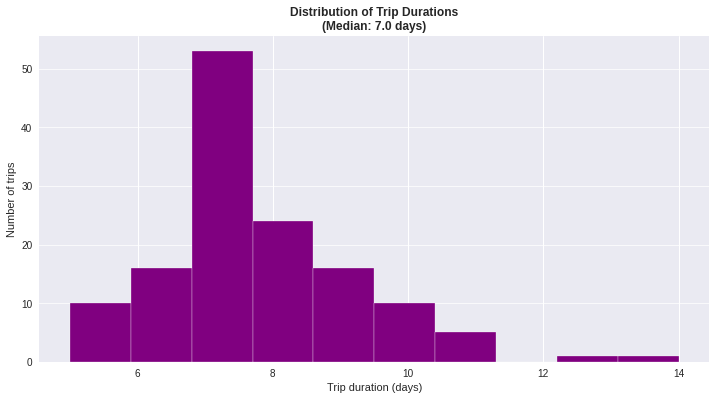

In [ ]:
median_duration = df['Duration (days)'].median()

fig, ax = plt.subplots(figsize=(12,6))
plt.hist(df['Duration (days)'], bins=10, color='purple')
plt.xlabel('Trip duration (days)')
plt.ylabel('Number of trips')
plt.title('Distribution of Trip Durations\n(Median: {} days)'.format(median_duration), fontweight='bold')
plt.grid(axis='y', alpha=0.75)
plt.show()


**The visualization shows that the majority of trip durations fall between 6-9 days, with the highest number of trips taken on the 7th day**. There were more than 50 trips taken on the 7th day, followed by 20+ trips on the 8th day and 15+ trips on the 9th day. In general, most trips lasted between 5-10 days, with 10 trips each on the 5th and 10th days.

The data shows that most travelers tend to take trips that last for about a week or slightly longer. This could be due to various reasons such as work schedules, budget constraints, and other commitments. Trips that are too short may not allow travelers to fully explore and enjoy the destination, while trips that are too long may be too costly or may interfere with other aspects of their lives. The most popular trip durations fall within the range of 6-9 days, with the highest number of trips being taken on the 7th day. This information can be helpful for travel agencies to design packages that cater to the preferences and needs of their clients, such as offering 7-day packages with various activities and attractions to explore.